In [6]:
# Import appropriate libraries
import pandas as pd
import numpy as np
import datetime as dt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

let's analyze the latest dataset in order to get a better understanding of the data and how COVID19 is affecting the world.

We will explore at how COVID19 has been growing throughout the world Since 22nd january 2020. We will be using various visualization tehniques to show the share of COVID19 Cases worldwide and explore the impact of virus.


In [7]:
# Read the dataset
df_train = pd.read_csv('../input/covid_19_data.csv')
df_train.head()

,SNo,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [9]:
# Check the dataset
display(df_train.head())
display(df_train.describe())
display(df_train.info())

,SNo,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


,SNo,Confirmed,Fatalities,Recovered
count,21866.000000,21866.000000,21866.000000,21866.000000
mean,10933.500000,4186.011479,267.482027,1149.608250
std,6312.314829,19133.805875,1814.574950,7981.896646
min,1.000000,0.000000,0.000000,0.000000
25%,5467.250000,13.000000,0.000000,0.000000
50%,10933.500000,136.000000,2.000000,3.000000
75%,16399.750000,946.000000,14.000000,111.000000
max,21866.000000,321192.000000,29427.000000,189791.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21866 entries, 0 to 21865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SNo             21866 non-null  int64 
 1   Date            21866 non-null  object
 2   Province_State  10586 non-null  object
 3   Country_Region  21866 non-null  object
 4   Last_Update     21866 non-null  object
 5   Confirmed       21866 non-null  int64 
 6   Fatalities      21866 non-null  int64 
 7   Recovered       21866 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


None

In [10]:
df = df_train[['Date','Province_State','Country_Region','Last_Update','Confirmed','Fatalities','Recovered']]

In [11]:
df.head()

,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


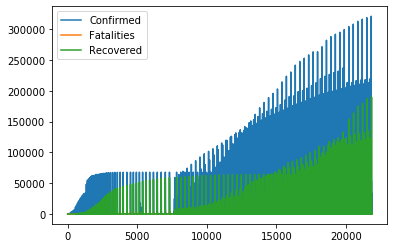

In [12]:
df.plot()

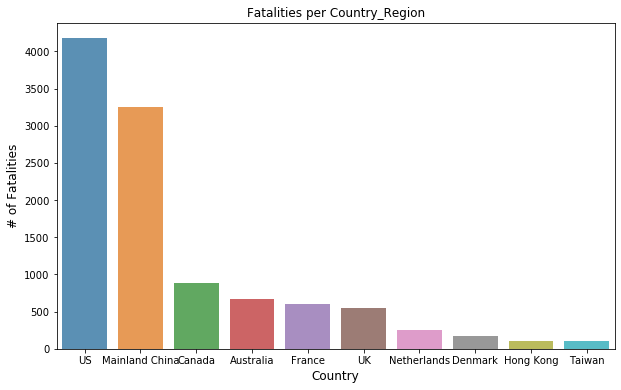

In [13]:
# number of Fatalities country wise
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Fatalities',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(10,6))
ax= sns.barplot(x.Country_Region, x.Confirmed, alpha=0.8)
plt.title("Fatalities per Country_Region")
plt.ylabel('# of Fatalities', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

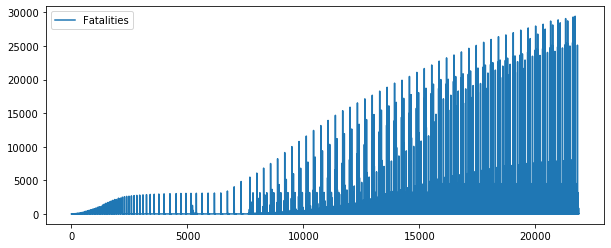

In [14]:
# Plot to show Fatalities
df['Fatalities'].plot(legend=True,figsize=(10,4))
plt.show()

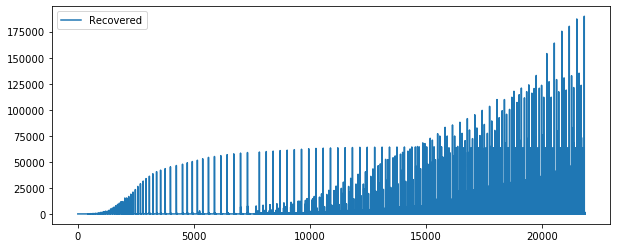

In [15]:
# Plot to show Country_wise Recovered
df['Recovered'].plot(legend=True,figsize=(10,4))
plt.show()

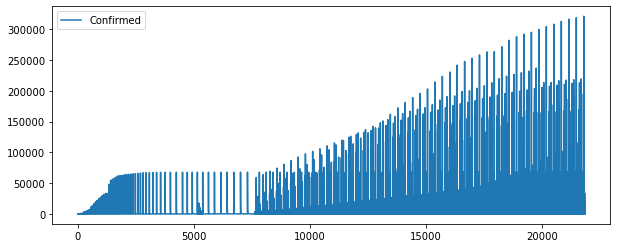

In [16]:
# Plot to show Confirmed
df['Confirmed'].plot(legend=True,figsize=(10,4))
plt.show()

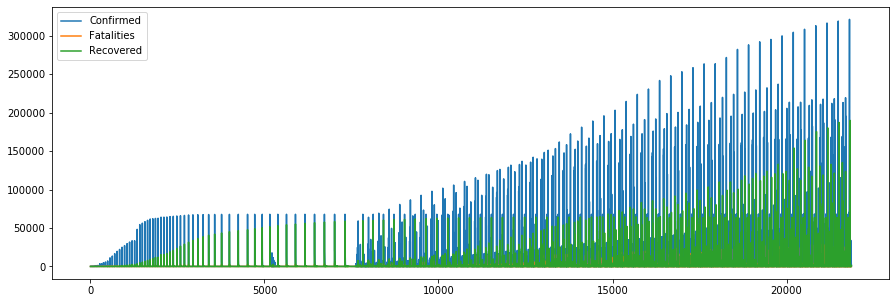

In [17]:
# Plot to check Status of the different columns
df.plot(legend=True,figsize=(15,5))
plt.show()

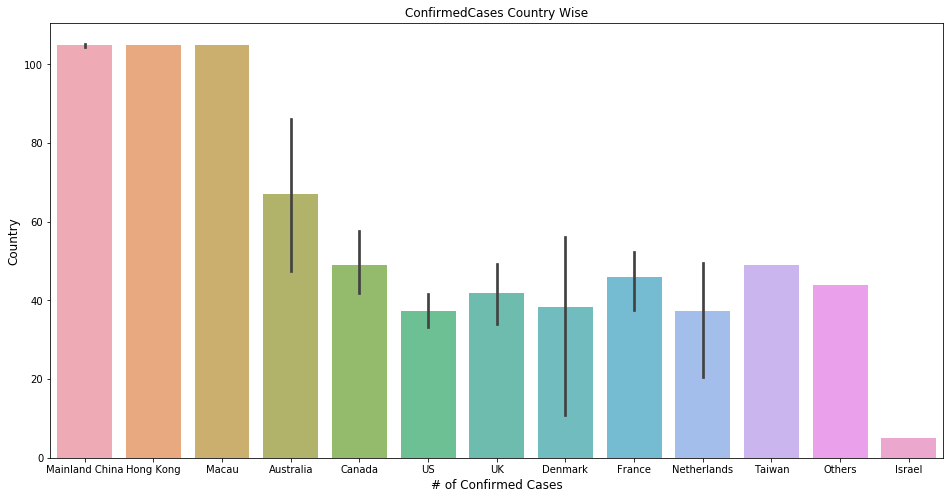

In [18]:
# number of Confirmed cases per Country
x=df.groupby(['Country_Region', 'Province_State']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:200].reset_index()
x
# #plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x.Country_Region, x.Fatalities, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

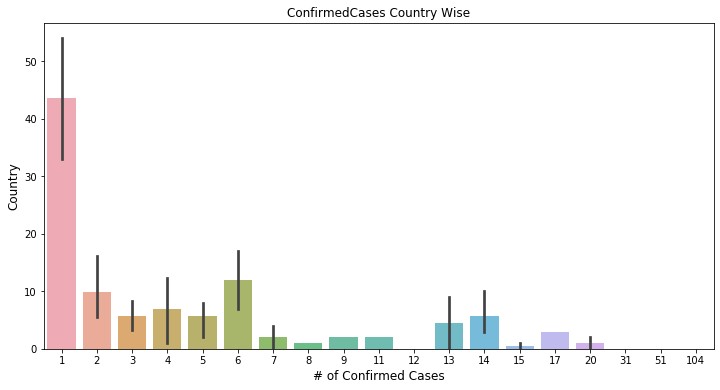

In [19]:
# number of Confirmed cases per Country
x=df.groupby(['Country_Region', 'Fatalities']).count()
x=x.sort_values(by='Country_Region',ascending=False)
x=x.iloc[0:100].reset_index()
x
# #plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

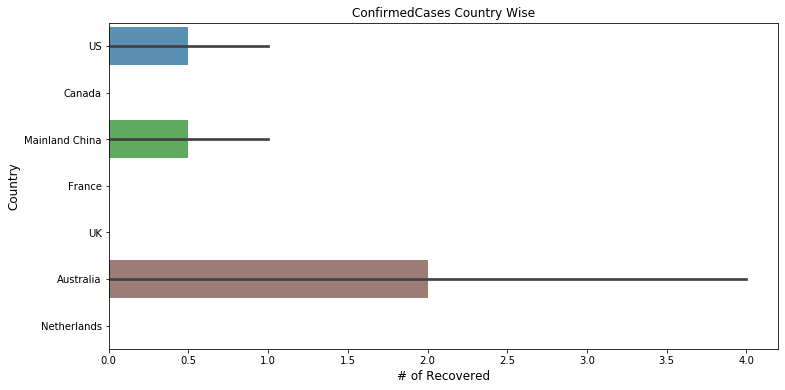

In [20]:
# number of Recovered cases per Country
x=df.groupby(['Country_Region', 'Recovered']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.Recovered, x.Country_Region, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Recovered', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [21]:
# How many countries affected 
countries = df['Country_Region'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

222 countries are in dataset:
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Li

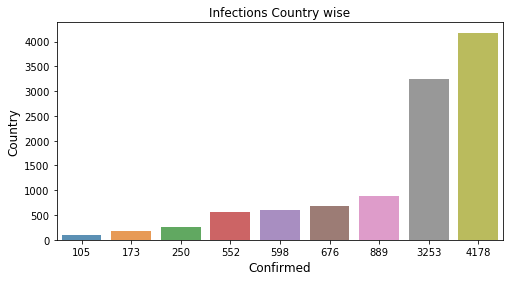

In [22]:
# number of Confirmed cases 
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("Infections Country wise")
plt.ylabel('Country', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

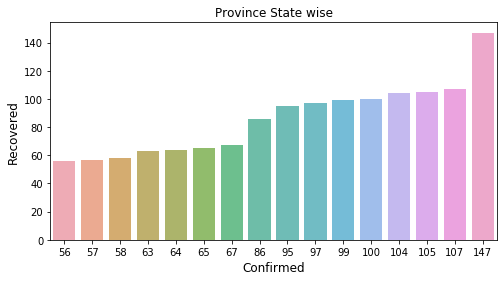

In [23]:
# number based on Province and Fatalities
x=df.groupby(['Province_State']).count()
x=x.sort_values(by='Fatalities',ascending=False)
x=x.iloc[0:100].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Recovered, alpha=0.8)
plt.title("Province State wise")
plt.ylabel('Recovered', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

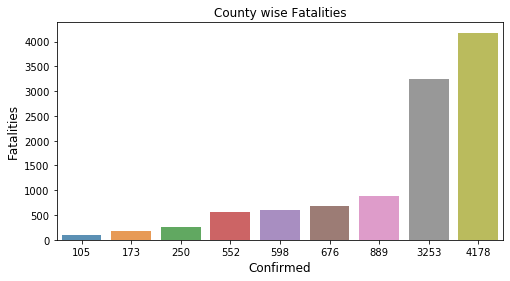

In [24]:
# number based on County wise and Confirmed cases
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("County wise Fatalities")
plt.ylabel('Fatalities', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

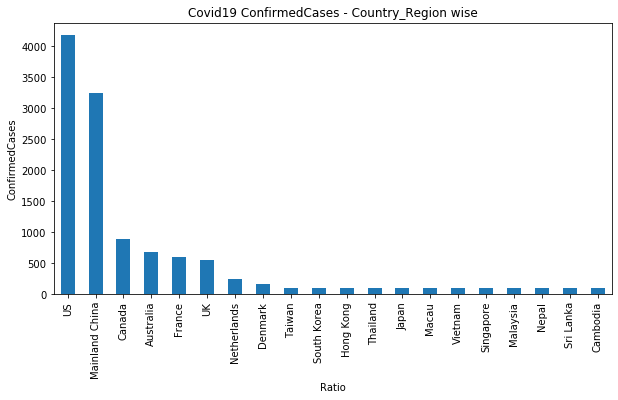

In [25]:
# Plot to check Confirmed cases by Country 
df.Country_Region.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases - Country_Region wise")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

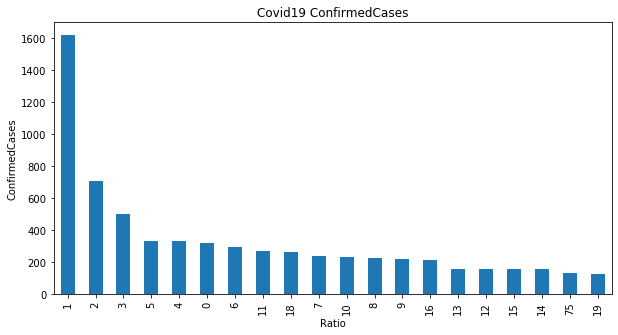

In [26]:
# Plot to check Confirmed cases 
df.Confirmed.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");